In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Dataset Loading and Initial Analysis

* <u>load the time series dataset</u>: it provides the <b>mean temperature</b> from 1st January 2013 to 24th April 2017 in the city of Delhi, India and it has
* <u>date column is set as index</u>
* <u>visualize the dataset</u>

In [2]:
df = pd.read_csv(
    "C://Users//Sara//Desktop//Data_Science_An1_Sem2//Time Series Analysis//Assignments//DailyDelhiClimateTrain.csv",
    parse_dates=["date"], index_col="date")
df = pd.DataFrame(df['meantemp'])
df.head()

,meantemp
date,
2013-01-01,10.000000
2013-01-02,7.400000
2013-01-03,7.166667
2013-01-04,8.666667
2013-01-05,6.000000


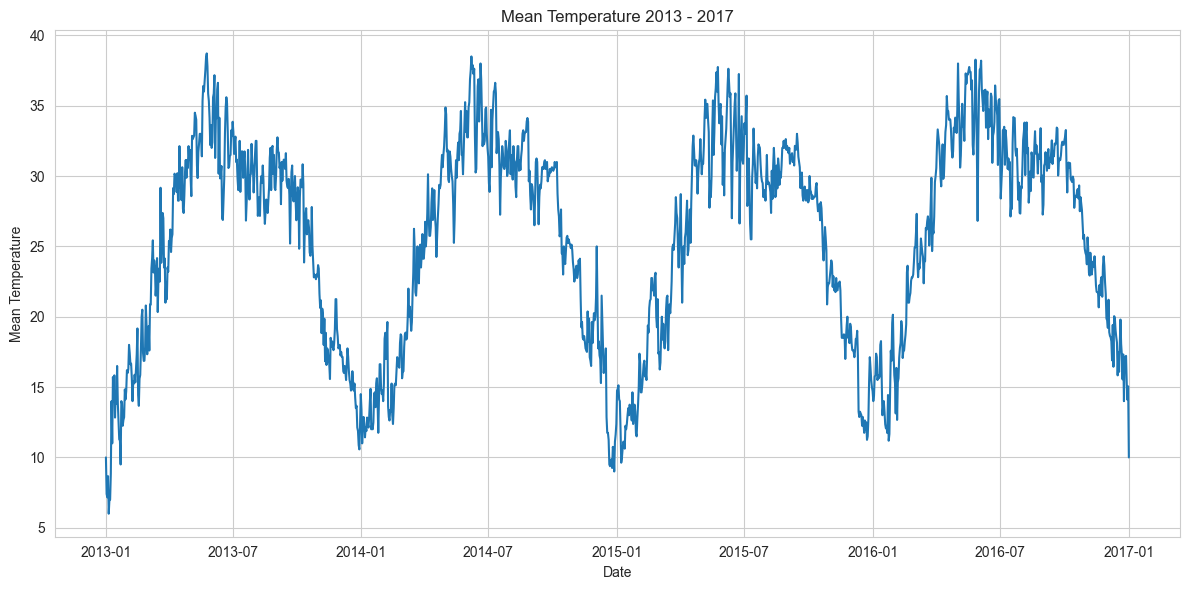

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(df)

plt.title("Mean Temperature 2013 - 2017")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")

plt.tight_layout()
plt.show()

# Statistical Analysis

* <u>calculate mean and variance</u>: check if they change over time
* <u>Augmented Dickey-Fuller test</u>: to see whether a time series is <b>stationary</b> or <b>non-stationary</b>

<b>Stationary</b>
* statistical properties are constant and there is no seasonality in the time series
* mean of the time series is constant
* standard deviation of the time series is constant
* there is no trend/seasonality

<b>Non-stationary</b>
* statistical properties change over time
* there is a trend and seasonality component

In [4]:
mean = round(df.mean(), 2).iloc[0]
variance = round(df.var(), 2).iloc[0]

print(f'The mean value is {mean}.')
print(f'The variance is {variance}.')

The mean value is 25.5.
The variance is 53.99.


In [5]:
def variation(time):
    rolling_mean = df.rolling(window=time).mean()
    rolling_variance = df.rolling(window=time).var()

    plt.figure(figsize=(12, 6))
    plt.plot(rolling_mean, label="Mean")
    plt.plot(rolling_variance, label="Variance")

    plt.title("Mean and Variance Variations")
    plt.xlabel("Date")
    plt.ylabel("Mean Temperature")
    plt.legend()

    plt.tight_layout()
    plt.show()

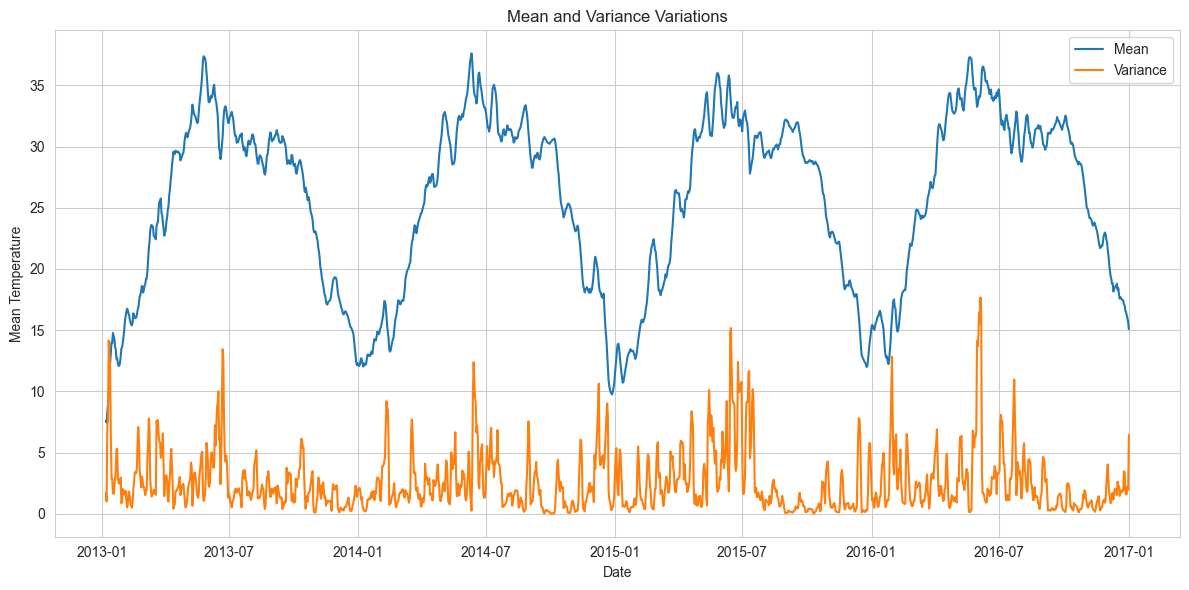

In [6]:
# a week
variation(7)

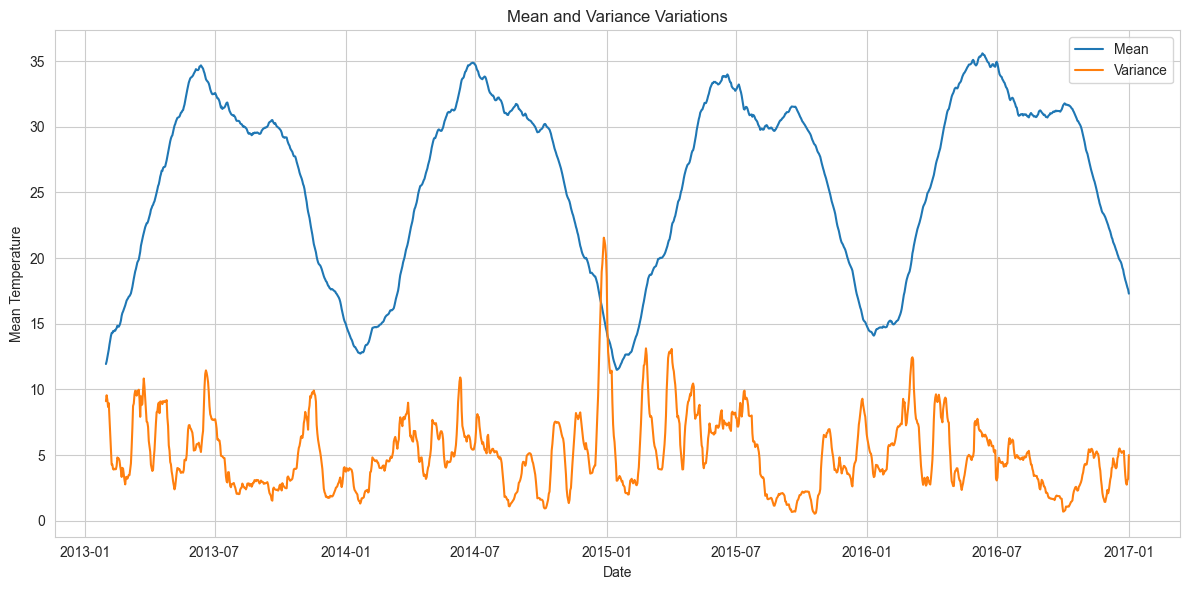

In [7]:
# a month
variation(30)

Observations:
* weeks (7 days): the data is non-stationary, with significant fluctuations in variance, and the mean follows the same trend as the original time series plot
* months (30 days): the data is still non-stationary, but the variance shows less fluctuation. However, the mean still follows the general pattern of the original time series

<u>Augmented Dickey-Fuller test</u>:
* sees if the time series is stationary or non-stationary
* checks for the presence of a unit root
* <b>p = 0</b> -> no unit root, stationary
* <b>p > 0</b> -> non-staionary

In [8]:
augmented_dickey_fuller_test = adfuller(df, maxlag=None, regression="c", autolag="AIC", store=False, regresults=False)

test_statistics = augmented_dickey_fuller_test[0]
p_value = augmented_dickey_fuller_test[1]
print("Test Statistics:", test_statistics)
print("P-value:", p_value )

if p_value > 0:
    print("Time series is non-stationary.")
elif p_value == 0:
    print("Time series is stationary.")

Test Statistics: -2.0210690559206728
P-value: 0.27741213723016056
Time series is non-stationary.


# Correlation Testing

* <u>Durbin-Watson test<u>
* Autocorrelation Function (ACF)
* Partial Autocorrelation Function (PACF)

<u>Durbin-Watson</u>:
* value <b>closer to 0</b> -> positive correlation
* value is <b>2</b> -> no correlation
* value <b>closer to 4</b> -> negative correlation

In [9]:
result = seasonal_decompose(df, model='additive', period=365, extrapolate_trend='freq')
residual = result.resid

durbin_watson_test = durbin_watson(residual, axis=0)
print(f'Durbin-Watson statistics: {durbin_watson_test}')

Durbin-Watson statistics: 0.600722602188568


The results indicate a strong time-based correlation, meaning that nearby values are dependent on each other.

<u>Autocorrelation Function (ACF)</u>:
* OX: lags
* OY: autocorrelation value
* <b>-1.0</b> -> uncorrelated
* <b>1.0</b> -> correlated
* height of the bar represents the correlation coefficient at that lag
* <b>gradual decline</b>: a gradual decline in bar heights suggests a long-term dependency in the data


In [10]:
acf_values = acf(df)
print(acf_values)

[1.         0.9711027  0.95095435 0.93435913 0.92457295 0.91551781
 0.90737097 0.89843343 0.89046222 0.88351839 0.87855285 0.87618765
 0.87108249 0.86575916 0.85981725 0.85384141 0.84625367 0.83890942
 0.83112316 0.82443026 0.8159426  0.80555558 0.79472453 0.78396174
 0.77645828 0.76750406 0.75910245 0.74987832 0.74150154 0.7333316
 0.72481656 0.71526761]


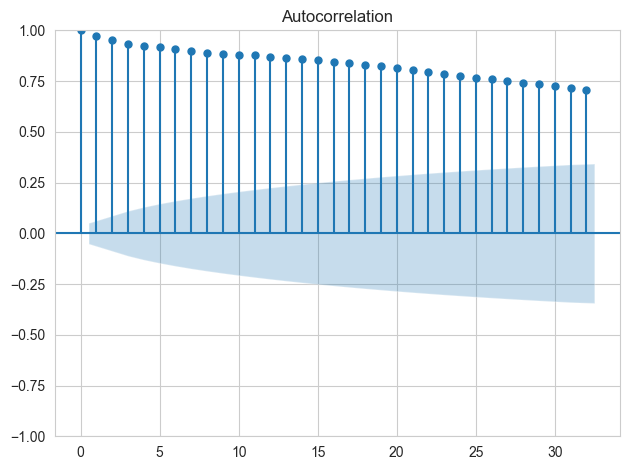

In [11]:
plot_acf(df)
plt.tight_layout()
plt.show()

<u>Partial Autocorrelation Function (ACF)</u>:
* shows which data points are informative and which are harmonics
* OX: lags
* OY: partial autocorrelation value
* if <b>spike > significant limits</b> -> correlation for that lag doesn't equal zero


In [12]:
pacf_values = pacf(df)
print(pacf_values)

[ 1.00000000e+00  9.71767379e-01  1.42364777e-01  7.88969109e-02
  1.41828110e-01  6.22565484e-02  5.15089275e-02  2.11384945e-02
  3.40252415e-02  3.79659813e-02  5.50039442e-02  8.09268641e-02
 -6.33884136e-03  1.55721559e-02  7.91568445e-03 -7.76782361e-04
 -2.90482552e-02 -8.94352799e-03 -1.42939982e-02  7.11042521e-03
 -3.51147762e-02 -5.71156660e-02 -4.23051880e-02 -3.65580202e-02
  2.58941367e-02 -3.62295900e-02 -9.71953819e-03 -1.70105552e-02
 -3.02372537e-03 -2.91020136e-03 -2.30343668e-02 -2.87096491e-02]


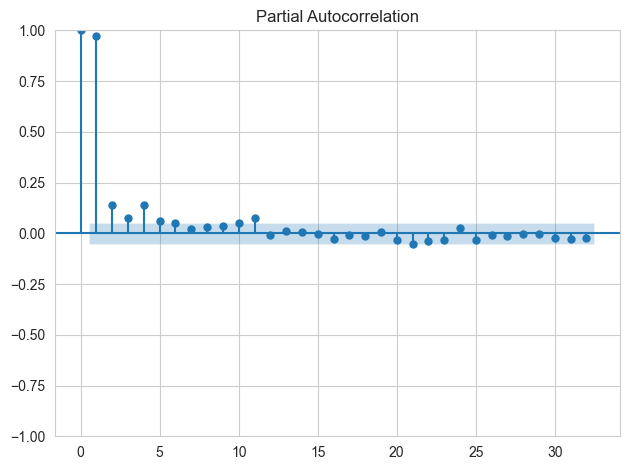

In [13]:
plot_pacf(df)
plt.tight_layout()
plt.show()

On non-stationary data:
* ACF is not informative
* PACF correlation on lag 1 => it is enough to know the point before to predict the behaviour for this data

Conclusions:
* the temperature of a certain day depends on the last 1-2 days (from PACF)


# Frequency Domain Decopmposition

* <u>spectral analysis</u>: periodogram and fast fourier transform (fft)
* <u>plot the signal</u>

C:\Users\Sara\Desktop\Data_Science_An1_Sem2\Time Series Analysis\.venv\Lib\site-packages\matplotlib\cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\Sara\Desktop\Data_Science_An1_Sem2\Time Series Analysis\.venv\Lib\site-packages\matplotlib\cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


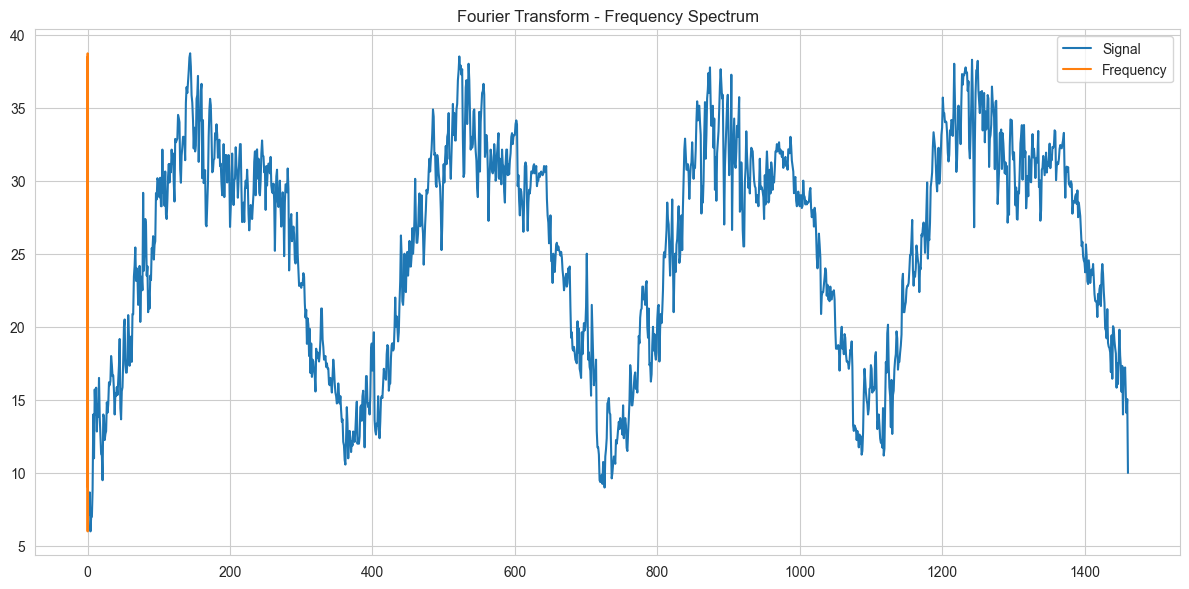

In [25]:
# fft
fft_signal = np.fft.fft(df)
fft_frequencies = np.fft.fftfreq(len(df), 1)
fft_magnitude = np.abs(fft_signal)

plt.figure(figsize=(12, 6))
plt.plot(fft_signal, label="Signal")
plt.plot(fft_frequencies, fft_magnitude, label="Frequency")
plt.title("Fourier Transform - Frequency Spectrum")

plt.legend()
plt.tight_layout()
plt.show()
